Examine role of different M-A neural population parameters in behavioral prediction

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from disp import set_plot

cc = np.concatenate


TARG_BHV = 'MTN'
# TARG_BHV = 'MTN_RSDL'

In [2]:
df_ma_param = pd.read_csv('data/simple/neur/baker_ma_fit_param.csv')
ma_mtn_fit_data = np.load(f'data/simple/mlv/neur_basic/baker_ma_nm91_zh23_{TARG_BHV.lower()}_ridge_alpha_10.npy', allow_pickle=True)[0]

In [3]:
x_ss = np.array(df_ma_param['X_S'])
x_ps = np.array(df_ma_param['X_P'])
sels = (np.abs(x_ps) - np.abs(x_ss)) / (np.abs(x_ss) + np.abs(x_ps))

### Paper figure

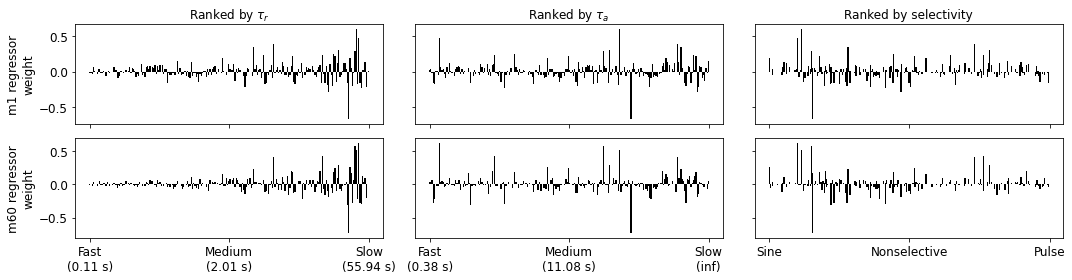

In [16]:
fig, axs = plt.subplots(2, 3, figsize=(15, 4), tight_layout=True)

for crow, (ax_row, twdw) in enumerate(zip(axs, [1, 60])):
    
    targ = f'{TARG_BHV}_MN_{twdw}'
    w_mn = ma_mtn_fit_data['w'][targ].mean(0)
    
    y_label = f'm{twdw} regressor\nweight'

    ax_row[0].bar(np.linspace(0, 1, 224), w_mn[np.argsort(df_ma_param['TAU_R'])], width=1/224, color='k')
    ax_row[1].bar(np.linspace(0, 1, 224), w_mn[np.argsort(df_ma_param['TAU_A'])], width=1/224, color='k')
    ax_row[2].bar(sels, w_mn, width=2/224, color='k')
    
    if crow == 0:
        set_plot(ax_row[0], x_ticks=[0, .5, 1], x_tick_labels=['', '', ''], title=r'Ranked by $\tau_r$', y_label=y_label, font_size=12)
        set_plot(ax_row[1], x_ticks=[0, .5, 1], x_tick_labels=['', '', ''], title=r'Ranked by $\tau_a$', y_tick_labels=[], font_size=12)
        set_plot(ax_row[2], x_ticks=[-1, 0, 1], x_tick_labels=['', '', ''], title=r'Ranked by selectivity', y_tick_labels=[], font_size=12)
    elif crow == 1:
        set_plot(ax_row[0], x_ticks=[0, .5, 1], x_tick_labels=[f'Fast\n({np.min(df_ma_param["TAU_R"]):.2f} s)', f'Medium\n({np.median(df_ma_param["TAU_R"]):.2f} s)', f'Slow\n({np.median(sorted(df_ma_param["TAU_R"])[-5:]):.2f} s)'], y_label=y_label, font_size=12)
        set_plot(ax_row[1], x_ticks=[0, .5, 1], x_tick_labels=[f'Fast\n({np.min(df_ma_param["TAU_A"]):.2f} s)', f'Medium\n({np.median(df_ma_param["TAU_A"]):.2f} s)', f'Slow\n(inf)'], y_tick_labels=[], font_size=12)
        set_plot(ax_row[2], x_ticks=[-1, 0, 1], x_tick_labels=['Sine', 'Nonselective', 'Pulse'], y_tick_labels=[], font_size=12)
        
fig.savefig('ms/fig2ghi.svg')